In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import torch
import os
print(os.listdir('/Users/mac/Desktop/snu-2021-1-ds-project-3'))

from PyEMD import EMD, Visualisation
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['.DS_Store', 'test', 'train', 'data', 'sample_submission.csv']


In [3]:
training_dir = '/Users/mac/Desktop/snu-2021-1-ds-project-3/train'
test_dir = '/Users/mac/Desktop/snu-2021-1-ds-project-3/test'

In [5]:
train_record_df = pd.read_csv('/Users/mac/Desktop/snu-2021-1-ds-project-3/data/train_record_df.csv', index_col=0)
train_attrib_df = pd.read_csv('/Users/mac/Desktop/snu-2021-1-ds-project-3/data/train_attrib_df.csv', index_col=0)

test_record_df = pd.read_csv('/Users/mac/Desktop/snu-2021-1-ds-project-3/data/test_record_df.csv', index_col=0)
test_attrib_df = pd.read_csv('/Users/mac/Desktop/snu-2021-1-ds-project-3/data/test_attrib_df.csv', index_col=0)

In [46]:
#test = pd.DataFrame(train_record_df.iloc[0, :])
test = train_record_df.iloc[0].to_numpy()
test.shape

(5000,)

In [37]:
train_record_df

0      1      2      3      4      5      6      7      8      9  \
0     -0.045 -0.045 -0.045 -0.045 -0.045 -0.045 -0.045 -0.045 -0.045 -0.045   
1     -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030   
2     -0.020 -0.020 -0.020 -0.020 -0.020 -0.020 -0.025 -0.022 -0.052 -0.088   
3      0.085  0.085  0.085  0.085  0.085  0.085  0.077  0.069  0.061  0.054   
4     -0.020 -0.020 -0.020 -0.020 -0.020 -0.020 -0.020 -0.021 -0.018 -0.015   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
38419  0.039  0.039  0.039  0.039  0.053  0.068  0.082  0.097  0.078  0.068   
38420  0.080  0.080  0.080  0.079  0.082  0.080  0.031 -0.033 -0.079 -0.115   
38421 -0.390 -0.390 -0.390 -0.391 -0.388 -0.390 -0.439 -0.500 -0.560 -0.610   
38422 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019   
38423 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019 -0.019   

       ...   4990   4991   4992   4993   4994   4995   4996   4997   4998  \
0      ... -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030   
1      ... -0.045 -0.045 -0.045 -0.045 -0.045 -0.045 -0.045 -0.045 -0.045   
2      ...  0.055  0.055  0.055  0.055  0.055  0.055  0.055  0.055  0.055   
3      ...  0.235  0.235  0.235  0.235  0.235  0.235  0.235  0.235  0.235   
4      ... -0.040 -0.040 -0.040 -0.040 -0.040 -0.040 -0.040 -0.040 -0.040   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
38419  ...  0.034  0.043  0.063  0.024  0.009  0.063  0.043 -0.004  0.009   
38420  ... -0.225 -0.225 -0.225 -0.225 -0.225 -0.225 -0.225 -0.225 -0.225   
38421  ... -0.420 -0.420 -0.420 -0.420 -0.420 -0.420 -0.420 -0.420 -0.420   
38422  ... -0.034 -0.034 -0.034 -0.039 -0.039 -0.034 -0.029 -0.029 -0.019   
38423  ...  0.053  0.053  0.048  0.048  0.048  0.053  0.063  0.073  0.073   

        4999  
0     -0.030  
1     -0.045  
2      0.055  
3      0.235  
4     -0.040  
...      ...  
38419  0.053  
38420 -0.225  
38421 -0.420  
38422 -0.019  
38423  0.078  

[38424 rows x 5000 columns]

In [25]:
test_record_df

0      1      2      3      4      5      6      7      8      9  \
0      0.015  0.015  0.015  0.014  0.017  0.015 -0.023 -0.024  0.019  0.037   
1      0.025  0.025  0.025  0.024  0.026  0.025  0.005  0.030  0.077  0.106   
2     -0.025 -0.025 -0.025 -0.025 -0.025 -0.025 -0.029 -0.029 -0.033 -0.042   
3      0.025  0.025  0.025  0.025  0.025  0.025  0.025  0.025  0.025  0.025   
4     -0.039 -0.039 -0.039 -0.039 -0.039 -0.039 -0.039 -0.039 -0.043 -0.048   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
14773 -0.107 -0.107 -0.107 -0.107 -0.107 -0.107 -0.107 -0.107 -0.102 -0.102   
14774  0.015  0.015  0.015  0.015  0.015  0.015  0.015  0.015  0.014  0.017   
14775 -0.040 -0.040 -0.040 -0.040 -0.040 -0.040 -0.036 -0.034 -0.038 -0.038   
14776  0.015  0.015  0.015  0.015  0.015  0.015  0.023  0.026  0.026  0.032   
14777 -0.010 -0.010 -0.010 -0.010 -0.010 -0.010 -0.010 -0.013 -0.015 -0.016   

       ...   4990   4991   4992   4993   4994   4995   4996   4997   4998  \
0      ... -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030 -0.030   
1      ... -0.150 -0.150 -0.150 -0.150 -0.150 -0.150 -0.150 -0.150 -0.150   
2      ... -0.035 -0.035 -0.035 -0.035 -0.035 -0.035 -0.035 -0.035 -0.035   
3      ... -0.095 -0.095 -0.095 -0.095 -0.095 -0.095 -0.095 -0.095 -0.095   
4      ...  0.019  0.024  0.024  0.024  0.029  0.034  0.039  0.039  0.039   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
14773  ... -0.029 -0.029 -0.029 -0.034 -0.034 -0.034 -0.034 -0.039 -0.039   
14774  ... -0.130 -0.130 -0.130 -0.130 -0.130 -0.130 -0.130 -0.130 -0.130   
14775  ... -0.055 -0.055 -0.055 -0.055 -0.055 -0.055 -0.055 -0.055 -0.055   
14776  ...  0.355  0.355  0.355  0.355  0.355  0.355  0.355  0.355  0.355   
14777  ...  0.195  0.195  0.195  0.195  0.195  0.195  0.195  0.195  0.195   

        4999  
0     -0.030  
1     -0.150  
2     -0.035  
3     -0.095  
4      0.043  
...      ...  
14773 -0.043  
14774 -0.130  
14775 -0.055  
14776  0.355  
14777  0.195  

[14778 rows x 5000 columns]

In [24]:
train_attrib_df

label   age sex
0          8  59.0   F
1      2 3 8  76.0   F
2          8  28.0   M
3         11  54.0   F
4         10  60.0   M
...      ...   ...  ..
19207    1 3  69.0   M
19208      7  69.0   M
19209      4  66.0   M
19210      8  66.0   F
19211      3  74.0   M

[19212 rows x 3 columns]

In [10]:
train_attrib_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19212 entries, 0 to 19211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   19212 non-null  object 
 1   age     19124 non-null  float64
 2   sex     19212 non-null  object 
dtypes: float64(1), object(2)
memory usage: 600.4+ KB


### Preprocessing

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_attrib_df['age'] = scaler.fit_transform(np.array(train_attrib_df['age']).reshape(-1,1)).flatten()
train_attrib_df['age'] = train_attrib_df['age'].fillna(0.0)

test_attrib_df['age'] = scaler.transform(np.array(test_attrib_df['age']).reshape(-1,1)).flatten()
test_attrib_df['age'] = test_attrib_df['age'].fillna(0.0)

In [68]:
t = np.arange(0, 50, 0.01)

emd = EMD()
modified_EMD = []
before_signal = train_record_df.iloc[1].to_numpy()
imfs = emd.emd(before_signal, max_imf=3)

for q in range(0, 5000):
    modified_EMD.append(imfs[0][q] + imfs[1][q] + imfs[2][q])

# vis = Visualisation()
# vis.plot_imfs(imfs=imfs, 
#               t=t, 
#               include_residue=False
#              )

# vis.show()

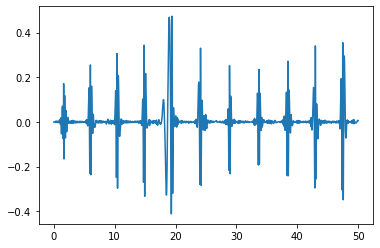

In [58]:
plt.plot(t, modified_EMD)

In [60]:
print(modified_EMD)

[-0.00036534910256974106, -0.00036729558865139907, -0.0003221564134490132, -0.00022998475646046656, -0.00010416596455891882, 4.3110672343018024e-05, 0.0001932010046130133, 0.0003254083952790171, 0.00041903620736903743, 0.0004552258473802611, 0.00042517501379836953, 0.0003354825609983603, 0.00020629369065031463, 6.0940546363500824e-05, -7.401942416494661e-05, -0.00017784061810897998, -0.00024658234508590984, -0.0002803299267196954, -0.00027916868463410494, -0.0002431839404531764, -0.00017557132913295062, -9.386654658349251e-05, -2.5800471680614574e-05, -8.17785799213204e-09, -4.970975302561178e-05, -0.00020731861497869957, -0.00048153533271744827, -0.0018648625981423886, 0.0006528749372353325, 0.00308185262190503, 0.002432245804355579, 0.001720845185414387, 0.000996049704158094, 0.0003225877988363106, -0.00027510764540943794, -0.0007902199625678739, -0.0012136590829766433, -0.0015352791593075228, -0.0017461149894216679, -0.0018587324342444894, -0.001949873613021636, -0.00208618218719367

In [78]:
# EMD preprocessing


def prepare_imfs(raw_signal, imf_number_list, max_imf) :
        emd = EMD()
        emd_processed = []
        for s in range(0, len(raw_signal)):  #per one ecg signal (0~5000) #5000-> train_num으로 바꾸기!
            print("****** Round ", s, " ******")
            modified_EMD = []
            before_signal = raw_signal.iloc[s].to_numpy()
            imfs = emd.emd(before_signal, max_imf=2)
            #combine imf 0, 1, 2
            for q in range(0, 5000):
                modified_EMD.append(imfs[0][q] + imfs[1][q] + imfs[2][q])  ##MODIFY HERE
            emd_processed.append(modified_EMD)
        return pd.DataFrame(emd_processed)
        
        
        
processed_test_array = prepare_imfs(raw_signal = test_record_df,
                                   imf_number_list = imf_number_list,
                                   max_imf = 2)
        
# imf_number_list = [0, 1, 2]
# imf_array = prepare_imfs(raw_signal = train_record_df, 
#                          imf_number_list = imf_number_list,
#                          max_imf = 3)

# vis = Visualisation()
# vis.plot_imfs(imfs=imfs, 
#               residue=res, 
#               t=t, 
#               include_residue=True
#              )
# vis.plot_instant_freq(t, imfs=imfs)
# vis.show()
        

In [79]:
processed_test_array = prepare_imfs(raw_signal = test_record_df,
                                   imf_number_list = imf_number_list,
                                   max_imf = 2)


****** Round  0  ******
****** Round  1  ******
****** Round  2  ******
****** Round  3  ******
****** Round  4  ******
****** Round  5  ******
****** Round  6  ******
****** Round  7  ******
****** Round  8  ******
****** Round  9  ******
****** Round  10  ******
****** Round  11  ******
****** Round  12  ******
****** Round  13  ******
****** Round  14  ******
****** Round  15  ******
****** Round  16  ******
****** Round  17  ******
****** Round  18  ******
****** Round  19  ******
****** Round  20  ******
****** Round  21  ******
****** Round  22  ******
****** Round  23  ******
****** Round  24  ******
****** Round  25  ******
****** Round  26  ******
****** Round  27  ******
****** Round  28  ******
****** Round  29  ******
****** Round  30  ******
****** Round  31  ******
****** Round  32  ******
****** Round  33  ******
****** Round  34  ******
****** Round  35  ******
****** Round  36  ******
****** Round  37  ******
****** Round  38  ******
****** Round  39  ******
****** Rou

In [80]:
processed_test_array.to_csv('/Users/mac/Desktop/processed_test_data.csv')

In [81]:
processed_train_array = prepare_imfs(raw_signal = train_record_df,
                                   imf_number_list = imf_number_list,
                                   max_imf = 2)


****** Round  0  ******
****** Round  1  ******
****** Round  2  ******
****** Round  3  ******
****** Round  4  ******
****** Round  5  ******
****** Round  6  ******
****** Round  7  ******
****** Round  8  ******
****** Round  9  ******
****** Round  10  ******
****** Round  11  ******
****** Round  12  ******
****** Round  13  ******
****** Round  14  ******
****** Round  15  ******
****** Round  16  ******
****** Round  17  ******
****** Round  18  ******
****** Round  19  ******
****** Round  20  ******
****** Round  21  ******
****** Round  22  ******
****** Round  23  ******
****** Round  24  ******
****** Round  25  ******
****** Round  26  ******
****** Round  27  ******
****** Round  28  ******
****** Round  29  ******
****** Round  30  ******
****** Round  31  ******
****** Round  32  ******
****** Round  33  ******
****** Round  34  ******
****** Round  35  ******
****** Round  36  ******
****** Round  37  ******
****** Round  38  ******
****** Round  39  ******
****** Rou

In [82]:
processed_train_array.to_csv('/Users/mac/Desktop/processed_train_data.csv')

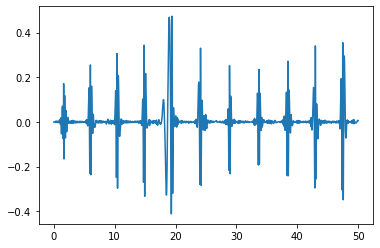

In [72]:
plt.plot(t, imf_array.iloc[1])

In [59]:
print(imf_array)

          0         1         2         3         4         5         6     \
0     0.022409  0.021811  0.021206  0.020593  0.019966  0.019324  0.018665   
1    -0.000365 -0.000367 -0.000322 -0.000230 -0.000104  0.000043  0.000193   
2     0.003828  0.005156  0.007074  0.009595  0.012707  0.016370  0.015528   
3    -0.001237 -0.001380 -0.000840  0.000390  0.002317  0.004944  0.000276   
4    -0.000495 -0.000164  0.000053  0.000145  0.000101 -0.000089 -0.000431   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.000374  0.001264  0.002099  0.002872  0.003580  0.004222  0.004800   
4996  0.031705  0.037876  0.038626  0.033715  0.024170  0.007563 -0.028382   
4997 -0.147978 -0.153613 -0.154998 -0.151917 -0.143216 -0.132015 -0.123680   
4998  0.044770  0.027060  0.009796 -0.006565 -0.021492 -0.034208 -0.043759   
4999  0.239782  0.257261  0.272796  0.285998  0.296455  0.303755  0.307487   

          7         8         9     ...      4990      4991    

In [74]:
imf_array.to_csv('/Users/mac/Desktop/processed_data.csv')

In [ ]:
#Training data prepare
"""
					for j in range(0,stop):
						write_signal = []
						for sample in range(samplelength,samplelength+samplenumber):
							ecg_signal = 0
							for i1 in range(0,15):
								ecg_signal = ecg_signal+signal[sample][i1]
							write_signal.append(ecg_signal)

						EMD_signal = np.asarray(write_signal)

						try:
							start_time_train = time.time()
							decomposer = EMD(EMD_signal,n_imfs=number_of_IMFs,maxiter=3000)
							imfs = decomposer.decompose()
							#Construct Modified EMD
							modified_EMD_train = []
							for q in range(0,samplenumber):
								modified_EMD_train.append(imfs[0][q]+imfs[1][q]+imfs[2][q])
							elapsed_time_train = time.time() - start_time_train
							Train_time.write(total_path+','+disease+','+str(elapsed_time_train)+'\n')
							#print len(imfs)

							str1 = str(imfs[0][0])
							str2 = str(imfs[1][0])

							if (len(imfs) == number_of_IMFs+1):
								for h in range(1,samplenumber):
									str1 = str1+','+str(imfs[0][h])
									str2 = str2+','+str(imfs[1][h])

								str1 = str1+','+disease+'\n'
								str2 = str2+','+disease+'\n'

								IMF1_train.write(str1)
								IMF2_train.write(str2)

								if number_of_IMFs >= 3:
									str3 = str(imfs[2][0])
									for h in range(1,samplenumber):
										str3 = str3+','+str(imfs[2][h])
									str3 = str3+','+disease+'\n'
									IMF3_train.write(str3)
								if number_of_IMFs >= 4:
									str4 = str(imfs[3][0])
									for h in range(1,samplenumber):
										str4 = str4+','+str(imfs[3][h])
									str4 = str4+','+disease+'\n'
									IMF4_train.write(str4)
								if number_of_IMFs >= 5:
									str5 = str(imfs[4][0])
									for h in range(1,samplenumber):
										str5 = str5+','+str(imfs[4][h])
									str5 = str5+','+disease+'\n'
									IMF5_train.write(str5)
								if number_of_IMFs==6:
									str6 = str(imfs[5][0])
									for h in range(1,samplenumber):
										str6 = str6+','+str(imfs[5][h])
									str6 = str6+','+disease+'\n'
									IMF6_train.write(str6)
							else:
								print ('IMF Number do not match')
								undecomposed = undecomposed + 1

							samplelength = samplelength+overlap

						except:
							print 'Could not be decomposed'
							samplelength = samplelength+overlap

					#Testing data preparation
					for j in range(stop,repetition):
						write_signal = []
						for sample in range(samplelength,samplelength+samplenumber):
							ecg_signal = 0
							for i1 in range(0,15):
								ecg_signal = ecg_signal+signal[sample][i1]
							write_signal.append(ecg_signal)

						EMD_signal = np.asarray(write_signal)

						try:
							start_time_test = time.time()
							decomposer = EMD(EMD_signal,n_imfs=number_of_IMFs,maxiter=3000)
							imfs = decomposer.decompose()
							#Construct Modified EMD
							modified_EMD_test = []
							for q in range(0,samplenumber):
								modified_EMD_test.append(imfs[0][q]+imfs[1][q]+imfs[2][q])
							elapsed_time_test = time.time() - start_time_test
							Test_time.write(total_path+','+disease+','+str(elapsed_time_test)+'\n')
							#print len(imfs)

							str1 = str(imfs[0][0])
							str2 = str(imfs[1][0])

							if (len(imfs) == number_of_IMFs+1):
								for h in range(1,samplenumber):
									str1 = str1+','+str(imfs[0][h])
									str2 = str2+','+str(imfs[1][h])

								str1 = str1+','+disease+'\n'
								str2 = str2+','+disease+'\n'

								IMF1_test.write(str1)
								IMF2_test.write(str2)

								if number_of_IMFs >= 3:
									str3 = str(imfs[2][0])
									for h in range(1,samplenumber):
										str3 = str3+','+str(imfs[2][h])
									str3 = str3+','+disease+'\n'
									IMF3_test.write(str3)
								if number_of_IMFs >= 4:
									str4 = str(imfs[3][0])
									for h in range(1,samplenumber):
										str4 = str4+','+str(imfs[3][h])
									str4 = str4+','+disease+'\n'
									IMF4_test.write(str4)
								if number_of_IMFs >= 5:
									str5 = str(imfs[4][0])
									for h in range(1,samplenumber):
										str5 = str5+','+str(imfs[4][h])
									str5 = str5+','+disease+'\n'
									IMF5_test.write(str5)
								if number_of_IMFs==6:
									str6 = str(imfs[5][0])
									for h in range(1,samplenumber):
										str6 = str6+','+str(imfs[5][h])
									str6 = str6+','+disease+'\n'
									IMF6_test.write(str6)
							else:
								print ('IMF Number do not match')
								undecomposed = undecomposed + 1

							samplelength = samplelength+overlap

						except:
							print 'Could not be decomposed'
							samplelength = samplelength+overlap

				string = patient_folder+'---'+file_name+'UNIMFed Records = '+str(undecomposed)+'\n'
				unIMFs.write(string)
				line = f.readline()


"""

### Helper functions

In [51]:
def read_files(is_training=True):
    list_id = []
    list_age = []
    list_sex = []
    list_recording = []
    list_labels = []
    
    target_record_df = train_record_df if is_training else test_record_df
    target_attrib_df = train_attrib_df if is_training else test_attrib_df

    n = len(target_attrib_df)
    for index in range(n):
        list_id.append(index)
        list_age.append(float(target_attrib_df.iloc[index]['age']))
        list_sex.append(target_attrib_df.iloc[index]['sex'])
        list_recording.append(np.array(target_record_df.iloc[[2*index, 2*index+1]]))

    if is_training:
        for index in range(n):
            list_labels.append(target_attrib_df.iloc[index]['label'].split())
        return list(zip(list_id, list_age, list_sex, list_recording, list_labels))

    else:
        return list(zip(list_id, list_age, list_sex, list_recording))
    

### PyTorch Custom Dataset
training sample을 batch 단위로 처리할 수 있도록 torch.uitls.data.Dataset을 이용한 custom dataset을 만들어 줍니다.

In [ ]:
class Dataset_ECG(torch.utils.data.Dataset):
    """
        Build ECG dataset
    """
    def __init__(self, dataset, num_classes=12):
        """
            dataset을 읽어들여 id, age, sex, recording, labels를 저장한 list를 만들어 줍니다.
        """
        self.sample_id = []
        self.sample_age = []
        self.sample_sex = []
        self.sample_recording = []
        self.sample_labels = []
        self.num_samples = len(dataset)
        
        for idx in range(self.num_samples):
            _id, _age, _sex, _recording, _labels = dataset[idx]
            # model에 input으로 들어가는 data는 torch.Tensor 타입으로 변환해 줍니다.
            age = torch.tensor(_age)
            sex = torch.tensor(0) if _sex == "F" else torch.tensor(1)
            recording = torch.tensor(_recording)
            labels = torch.tensor(np.zeros(num_classes))
            for label in _labels:
                labels[int(label)] = 1

            self.sample_id.append(_id)
            self.sample_age.append(age)
            self.sample_sex.append(sex)
            self.sample_recording.append(recording)
            self.sample_labels.append(labels)

        print(f'Loaded {self.num_samples} samples...')

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return {
            "id": self.sample_id[idx],
            "age": self.sample_age[idx],
            "sex": self.sample_sex[idx],
            "recording": self.sample_recording[idx],
            "labels": self.sample_labels[idx]
        }

### PyTorch CNN model

In [ ]:
from torch.nn import Module, Sequential, ReLU, Conv1d, Linear, BatchNorm1d, Dropout, MaxPool1d

class Feedback_CNN(Module):
    def __init__(self, num_classes=12, num_leads=2):
        super(Feedback_CNN, self).__init__()
        self.num_classes = num_classes
        self.num_leads = num_leads
        
        #self.conv = Conv1d(in_channels=self.num_leads, out_channels=32, kernel_size=5, stride=1, padding=2)
        #self.batch_norm = BatchNorm1d(32)
        
        self.relu = ReLU()

        self.conv1 = Conv1d(in_channels=self.num_leads, out_channels=32, kernel_size=15, stride=3, padding=2)
        self.conv_pad1 = Conv1d(in_channels=32, out_channels=32, kernel_size=5,stride=1,padding=2)
        self.max_pool1 = MaxPool1d(kernel_size=5, stride=1, padding=2)
        self.batch_norm1 = BatchNorm1d(32)
        
        self.conv2 = Conv1d(in_channels=32, out_channels=64, kernel_size=13, stride=3, padding=1)
        self.conv_pad2 = Conv1d(in_channels=64, out_channels=64, kernel_size=5,stride=1,padding=2)
        self.max_pool2 = MaxPool1d(kernel_size=5, stride=1, padding=2)
        self.batch_norm2= BatchNorm1d(64)

        self.conv3 = Conv1d(in_channels=64, out_channels=128, kernel_size=10, stride=2)
        self.conv_pad3 = Conv1d(in_channels=128, out_channels=128, kernel_size=5,stride=1,padding=2)
        self.max_pool3 = MaxPool1d(kernel_size=5, stride=1, padding=2)
        self.batch_norm3 = BatchNorm1d(128)

        self.conv4 = Conv1d(in_channels=128, out_channels=64, kernel_size=7, stride=2)
        self.conv_pad4 = Conv1d(in_channels=64, out_channels=64, kernel_size=5,stride=1,padding=2)
        self.max_pool4 = MaxPool1d(kernel_size=5, stride=1, padding=2)
        self.batch_norm4 = BatchNorm1d(64)

        self.conv5 = Conv1d(in_channels=64, out_channels=32, kernel_size=6, stride=2)
        self.conv_pad5 = Conv1d(in_channels=32, out_channels=32, kernel_size=5,stride=1,padding=2)
        self.max_pool5 = MaxPool1d(kernel_size=5, stride=1, padding=2)
        self.batch_norm5 = BatchNorm1d(32)

        self.drop_out = Dropout(p = 0.3)

        self.fc1 = Linear(32*64, 128)
        self.fc2 = Linear(130, self.num_classes)

        # for age, sex
        self.ln1 = Linear(2,32)
        self.ln2 = Linear(32,2)

    def forward(self, input):
        # 이 모델은 recording만을 input으로 받습니다. feature를 추가적으로 사용하도록 할 수도 있습니다.
        x = input[0]
        x_age = input[1]
        x_sex = input[2]
        
        #print(x.size()) # torch.Size([64, 2, 5000])
        x = self.conv1(x)
        x1 = x
        x = self.relu(x)
        x = self.conv_pad1(x)
        x = self.batch_norm1(x)
        x = x + x1
        x = self.relu(x)
        x = self.max_pool1(x)
        x = self.drop_out(x)
        
        #print(x.size()) # torch.Size([64, 32, 1664])
        
        x = self.conv2(x)
        x2 = x
        x = self.relu(x)
        x = self.conv_pad2(x)
        x = self.batch_norm2(x)
        x = x + x2
        x = self.relu(x)
        x = self.max_pool2(x)
        x = self.drop_out(x)

        #print(x.size()) # torch.Size([64, 64, 552])
        
        x = self.conv3(x)
        x3 = x
        x = self.relu(x)
        x = self.conv_pad3(x)
        x = self.batch_norm3(x)
        x = x + x3
        x = self.relu(x)
        x = self.drop_out(x)
        x = self.max_pool3(x)
        x = self.drop_out(x)

        #print(x.size()) # torch.Size([64, 128, 272])
        
        x = self.conv4(x)
        x4 = x
        x = self.relu(x)
        x = self.conv_pad4(x)
        x = self.batch_norm4(x)
        x = x + x4
        x = self.relu(x)
        x = self.max_pool4(x)
        x = self.drop_out(x)

        #print(x.size()) # torch.Size([64, 64, 133])
        
        x = self.conv5(x)
        x5 = x
        x = self.relu(x)
        x = self.conv_pad5(x)
        x = self.batch_norm5(x)
        x = x + x5
        x = self.relu(x)
        x = self.max_pool5(x)
        x = self.drop_out(x)

        #print(x.size()) # torch.Size([64, 32, 64])
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.size()) # torch.Size([64, 2048])
        x = self.fc1(x)
        #print(x.size())
        x = self.relu(x) # torch.Size([64, 128])

        x_age_sex = self.ln1(torch.cat((x_age,x_sex), dim = 1))
        x_age_sex = self.relu(x_age_sex)
        x_age_sex = self.ln2(x_age_sex)

        out = self.fc2(torch.cat((x,x_age_sex),dim = 1))

        return out

### Setup

In [14]:
total_training_set = sorted(read_files(training_dir), key=lambda sample: sample[0])
total_num_training = len(total_training_set)
print(f"Number of total training samples: {total_num_training}")

num_validation = int(total_num_training * 0.0)
num_training = total_num_training - num_validation

validation_set = total_training_set[:num_validation]
training_set = total_training_set[num_validation:]

print(f'Number of validation samples: {num_validation}')
print(f'Number of training samples: {num_training}')

Number of total training samples: 19212
Number of validation samples: 0
Number of training samples: 19212


In [15]:
# cuda gpu를 사용할 수 있을 경우 사용합니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [16]:
# 위에서 정의한 Dataset_ECG를 활용해 training dataset을 만들어 줍니다.
training_dataset = Dataset_ECG(training_set, num_classes=12)

Loaded 19212 samples...


In [70]:
# Training에 사용될 hyperparameter를 정해줍니다.
EPOCHS = 100
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [71]:
# Training dataset을 batch 단위로 읽어들일 수 있도록 DataLoader를 만들어줍니다.
training_loader = torch.utils.data.DataLoader(training_dataset, pin_memory=True, batch_size=BATCH_SIZE)

### Training

In [72]:
#model = myCNN(num_classes=12, num_leads=2)
#model = Example_CNN_v1(num_classes=12, num_leads=2)
#model = Anomaly_Classifier(num_classes=12, num_leads=2)
#model = CNN_v1(num_classes=12, num_leads=2)
model = Feedback_CNN(num_classes=12, num_leads=2)

In [73]:
model.to(device)
model.train()

criterion = torch.nn.BCEWithLogitsLoss() # for multi-label classification
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [74]:
# Training loop
for epoch in range(1, EPOCHS+1):
    print(f'***** Epoch {epoch} *****')
    epoch_training_loss_sum = 0.0
    if epoch == 25:
        optimizer.param_groups[0]['lr'] = 1e-4
    if epoch == 60:
        optimizer.param_groups[0]['lr'] = 1e-5
    for i_batch, sample_batched in enumerate(training_loader):
        b_recording = sample_batched["recording"].to(device)
        b_age = sample_batched["age"].to(device)
        b_sex = sample_batched["sex"].to(device)
        b_in = [b_recording.float(), torch.reshape(b_age,(-1,1)), torch.reshape(b_sex,(-1,1))]
        b_labels = sample_batched["labels"].to(device)
        optimizer.zero_grad()
        b_out = model(b_in)
        loss = criterion(b_out, b_labels)
        loss.backward()
        optimizer.step()
        epoch_training_loss_sum += loss.item() * b_labels.shape[0]

    epoch_training_loss = epoch_training_loss_sum / num_training
    print(f'training loss of epoch {epoch}: {epoch_training_loss}\n')

***** Epoch 1 *****
training loss of epoch 1: 0.22656420628381513

***** Epoch 2 *****
training loss of epoch 2: 0.18109528363084243

***** Epoch 3 *****
training loss of epoch 3: 0.16708303606279015

***** Epoch 4 *****
training loss of epoch 4: 0.15786691700735497

***** Epoch 5 *****
training loss of epoch 5: 0.1517730571424035

***** Epoch 6 *****
training loss of epoch 6: 0.14752754514141514

***** Epoch 7 *****
training loss of epoch 7: 0.14415646218742656

***** Epoch 8 *****
training loss of epoch 8: 0.14153561553954785

***** Epoch 9 *****
training loss of epoch 9: 0.1389106779011764

***** Epoch 10 *****
training loss of epoch 10: 0.135737525972891

***** Epoch 11 *****
training loss of epoch 11: 0.1341944524774046

***** Epoch 12 *****
training loss of epoch 12: 0.13160689659778563

***** Epoch 13 *****
training loss of epoch 13: 0.13004380273179206

***** Epoch 14 *****
training loss of epoch 14: 0.1284872445842559

***** Epoch 15 *****
training loss of epoch 15: 0.12757117

### Evaluation
evalutate on validation set

In [179]:
model.eval()

validation_prediction_df = pd.DataFrame(columns=['labels'])
validation_prediction_df.index.name = 'id'
validation_true_labels_df = pd.DataFrame(columns=['labels'])
validation_true_labels_df.index.name = 'id'

pred_list = []

with torch.no_grad():
    for idx in range(len(validation_set)):
        validation_sample = validation_set[idx]
        _, _age, _sex, _recording, labels = validation_sample
        age = torch.tensor(_age)
        sex = torch.tensor(0) if _sex == "F" else torch.tensor(1)
        recording = torch.tensor(_recording, dtype = torch.float32)

        valid_in = [recording.unsqueeze(0).to(device), 
                   torch.reshape(age,(-1,1)).to(device), 
                   torch.reshape(sex,(-1,1)).to(device)]
  
        out = model(valid_in) 
        sample_prediction = np.array(torch.sigmoid(out).squeeze().cpu())
        pred_list.append(sample_prediction)
        
        str_true_labels = ' '.join(labels)
        validation_true_labels_df.loc[idx] = [str_true_labels]
  
th_arr = np.array([0.25, 0.25, 0.25, 0.35, 0.15, 0.15, 0.25, 0.5, 0.4, 0.55, 0.25, 0.05])

valid_pred = np.array(pred_list) > th_arr

for idx in range(len(valid_pred)):
    valid_prediction = valid_pred[idx]
    indices_of_1s = np.where(valid_prediction)[0]
    str_indices_of_1s = ' '.join(map(str, indices_of_1s))
    validation_prediction_df.loc[idx] = [str_indices_of_1s]

In [111]:
# model.eval()

# validation_prediction_df = pd.DataFrame(columns=['labels'])
# validation_prediction_df.index.name = 'id'
# validation_true_labels_df = pd.DataFrame(columns=['labels'])
# validation_true_labels_df.index.name = 'id'

# with torch.no_grad():
#     for idx in range(len(validation_set)):
#         validation_sample = validation_set[idx]
#         _, _age, _sex, _recording, labels = validation_sample
        
#         age = torch.tensor(_age)
#         sex = torch.tensor(0) if _sex == "F" else torch.tensor(1)
#         recording = torch.tensor(_recording, dtype = torch.float32)
        
#         valid_in = [recording.unsqueeze(0).to(device), 
#                    torch.reshape(age,(-1,1)).to(device), 
#                    torch.reshape(sex,(-1,1)).to(device)]
        
#         out = model(valid_in) # unsqueeze는 batch dimension을 추가해주기 위함
#         sample_prediction = torch.sigmoid(out).squeeze() > 0.15 # Use 0.5 as a threshold / squeeze는 batch dimension을 제거해주기 위함
#         indices_of_1s = np.where(sample_prediction.cpu())[0]
#         str_indices_of_1s = ' '.join(map(str, indices_of_1s))
#         validation_prediction_df.loc[idx] = [str_indices_of_1s]
        
#         str_true_labels = ' '.join(labels)
#         validation_true_labels_df.loc[idx] = [str_true_labels]

In [84]:
print(validation_prediction_df[:10])

   labels
id       
0       8
1   2 3 8
2       8
3      10
4       8
5     3 9
6       8
7       8
8       9
9       8


In [46]:
print(validation_true_labels_df[:10])

   labels
id       
0       8
1   2 3 8
2       8
3      11
4      10
5     3 8
6       8
7      10
8       8
9       8


# Validation Set 결과 저장

기준! th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, **0.55**, **0.25**, **0.1**])

In [178]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.8852459  0.53684922 0.2254902 ]
macro f1 score on validation set: 0.6300749865814018


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, **0.55**, **0.25**, 0.15])

In [176]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.8852459  0.53684922 0.22121896]
macro f1 score on validation set: 0.6297190503769726


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, **0.55**, **0.25**, 0.2])

In [174]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.8852459  0.53684922 0.13981763]
macro f1 score on validation set: 0.6229356060064768


기준! th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, **0.55**, **0.25**, 0.25])

In [172]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.8852459  0.5257732  0.1027668 ]
macro f1 score on validation set: 0.618925034562171


기준! th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, **0.55**, 0.25, 0.25])

In [166]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.8852459  0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6198480367764468


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, 0.5, 0.25, 0.25])

In [164]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.88447653 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6197839228311707


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, 0.45, 0.25, 0.25])

In [162]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.8765653  0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6191246529039971


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, 0.4, 0.25, 0.25])

In [160]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.86879433 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6184770721599294


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, 0.35, 0.25, 0.25])

In [158]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.86772487 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6183879506169072


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, 0.3, 0.25, 0.25])

In [156]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.86013986 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6177558666514898


기준! th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, **0.4**, 0.25, 0.25, 0.25])

In [149]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94602327 0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.617671747871719


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, 0.35, 0.25, 0.25, 0.25])

In [147]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94568933 0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6176439194252419


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, 0.3, 0.25, 0.25, 0.25])

In [145]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.94444444 0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.617540179148695


기준! th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, **0.5**, 0.25, 0.25, 0.25, 0.25])

In [138]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87874016 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6174226758586029


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, 0.45, 0.25, 0.25, 0.25, 0.25])

In [136]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.87363495 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6169972415183946


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, 0.4, 0.25, 0.25, 0.25, 0.25])

In [134]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.86996904 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6166917494225498


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, 0.35, 0.25, 0.25, 0.25, 0.25])

In [132]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.86809816 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6165358426943435


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, 0.3, 0.25, 0.25, 0.25, 0.25])

In [130]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.86453577 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6162389767890231


기준! th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, **0.15**, **0.25**, 0.25, 0.25, 0.25, 0.25, 0.25])

In [120]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.21052632
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6160848766655915


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [118]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.18348624
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6138315368941446


기준! th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, **?0.15**, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [116]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.43243243 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6116989117533108


th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [114]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.42567568 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6111358486902477


**기준!!** th_arr = np.array([**0.25**, **0.25**, **0.25**, **0.35**, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [104]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6093707408858141


th_arr = np.array([**0.25**, **0.25**, *0.2*, **0.35**, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [102]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.74796748 0.78304518 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6082918007824838


th_arr = np.array([**0.25**, *0.2*, 0.25, **0.35**, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [100]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.85507246 0.76091476 0.78304518 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6090671465056342


th_arr = np.array([*0.3*, 0.25, 0.25, **0.35**, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [98]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.66940452 0.8587156  0.76091476 0.78304518 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6088257561739621


th_arr = np.array([*0.2*, 0.25, 0.25, **0.35**, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [95]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.66539924 0.8587156  0.76091476 0.78304518 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6084919830147894


th_arr = np.array([0.25, 0.25, 0.25, **0.35**, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [92]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.78304518 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6093707408858141


th_arr = np.array([0.25, 0.25, 0.25, 0.3, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [88]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.77795963 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6089469453308346


th_arr = np.array([0.25, 0.25, 0.25, 0.4, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [86]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.77739331 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6088997521009867


모두 0.25, 25, 60 learning rate 구간 설정

In [77]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67594433 0.8587156  0.76091476 0.76816239 0.40449438 0.15789474
 0.36697248 0.86268657 0.9430344  0.85913043 0.53684922 0.1027668 ]
macro f1 score on validation set: 0.6081305090090792


모두 0.25, weight_decay=1e-4

In [61]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.67836257 0.81911263 0.57754011 0.71316819 0.41317365 0.12408759
 0.32846715 0.66524064 0.83211679 0.81089744 0.47296494 0.14854111]
macro f1 score on validation set: 0.5486394013786351


### Feedback_CNN with feedback threshold=0.25
optimizer = Adam EPOCHS = 100 BATCH_SIZE = 64 LEARNING_RATE = 0.001(20부터 0.001/2, 40부터 0.0001)
dropout=0.3

In [131]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.64435146 0.84476534 0.76673428 0.78255946 0.41767068 0.13333333
 0.33663366 0.86676428 0.94222391 0.87867647 0.5266229  0.15972222]
macro f1 score on validation set: 0.608338166686962


0.3

In [134]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.64347826 0.84460695 0.77366255 0.7817552  0.42622951 0.11827957
 0.32167832 0.875      0.94164607 0.87732342 0.52777778 0.10569106]
macro f1 score on validation set: 0.603094057084934


0.2

In [137]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.63691684 0.8348135  0.75049116 0.78135405 0.41198502 0.16393443
 0.35185185 0.85632184 0.94343891 0.87410072 0.5253893  0.18181818]
macro f1 score on validation set: 0.609367983233361


0.15

In [140]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.61895551 0.83216783 0.74339623 0.77408819 0.41522491 0.16271186
 0.33810888 0.84151473 0.94161817 0.86678508 0.51915946 0.20674157]
macro f1 score on validation set: 0.605039368834014


-----------------------모델 구분선------------------------------------

0.2

In [115]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.651341   0.83754513 0.73684211 0.74595142 0.4379562  0.19130435
 0.29538462 0.82885431 0.94205607 0.88256228 0.50590429 0.13043478]
macro f1 score on validation set: 0.5988447124763057


### Feedback_CNN with feedback threshold=0.25
optimizer = Adam
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001(20부터 1e-4, 40부터 1e-5)
dropout=0.3

In [112]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.6506986  0.83882784 0.74463938 0.75528078 0.43027888 0.1980198
 0.28767123 0.84057971 0.94333959 0.88172043 0.52144772 0.10727969]
macro f1 score on validation set: 0.5999819718684855


0.3

In [108]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.65135699 0.83858998 0.75449102 0.7606383  0.42677824 0.15469613
 0.27338129 0.85376662 0.94427711 0.88648649 0.51589595 0.08571429]
macro f1 score on validation set: 0.595506034423383


0.35

In [104]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.65517241 0.84171322 0.76267748 0.76361656 0.4173913  0.12345679
 0.27067669 0.86315789 0.94665153 0.89051095 0.51512801 0.07291667]
macro f1 score on validation set: 0.5935891260817504


0.4

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.66966292 0.84310019 0.77018634 0.7627024  0.40552995 0.09271523
 0.232      0.86890244 0.94714829 0.89667897 0.50084317 0.04678363]
macro f1 score on validation set: 0.5863544602687738


0.45

In [94]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.66976744 0.84291188 0.77542373 0.7696726  0.38647343 0.04109589
 0.21940928 0.87171561 0.94841421 0.89552239 0.48872858 0.03726708]
macro f1 score on validation set: 0.5788668442883022


0.55

In [98]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.65491184 0.83921569 0.76853933 0.76621787 0.33684211 0.01470588
 0.1981982  0.87244094 0.9458887  0.89943074 0.48571429 0.01333333]
macro f1 score on validation set: 0.5662865756057421


### Feedback_CNN with feedback(threshold=0.5)
optimizer = Adam
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [84]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.66666667 0.84719536 0.77802198 0.76859504 0.35714286 0.02816901
 0.20960699 0.87538941 0.94593558 0.89849624 0.48715509 0.02597403]
macro f1 score on validation set: 0.5740290208215793


### Feedback_CNN with feedback
optimizer = Adam
EPOCHS = 30
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.65227818 0.85606061 0.75115207 0.76827757 0.37681159 0.04109589
 0.1010101  0.85758998 0.94137931 0.9039548  0.47046843 0.02597403]
macro f1 score on validation set: 0.5621710474023374


### Feedback_CNN with no feedback
optimizer = Adam
EPOCHS = 30
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [55]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.63938619 0.85090909 0.74172185 0.77118644 0.28235294 0.
 0.17647059 0.81391304 0.93835098 0.88973384 0.35205993 0.        ]
macro f1 score on validation set: 0.5380070747330329


### 조교님 model 점수

In [385]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

mlb = MultiLabelBinarizer(classes=['0','1','2','3','4','5','6','7','8','9','10','11'])
mlb.fit(map(str.split, validation_true_labels_df['labels'].values))

macro_f1_validation = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average=None)
print(f'macro f1 score on validation set: {macro_f1_validation}')

macro_f1_validation_whole = f1_score(mlb.transform(map(str.split, validation_true_labels_df['labels'].values)), mlb.transform(map(str.split, validation_prediction_df['labels'].values)), average='macro')
print(f'macro f1 score on validation set: {macro_f1_validation_whole}')

macro f1 score on validation set: [0.45405405 0.67230444 0.53391685 0.64206642 0.04371585 0.06896552
 0.03076923 0.73630137 0.9009716  0.84859813 0.32536765 0.08695652]
macro f1 score on validation set: 0.44533230228243387


### Test Prediction
학습된 모델로 test_set에 대한 prediction을 진행합니다.

In [181]:
test_set = sorted(read_files(is_training=False), key=lambda sample:sample[0])
num_test = len(test_set)
print(f'Number of test samples: {num_test}')

Number of test samples: 7389


In [182]:
model.eval()

test_prediction_df = pd.DataFrame(columns=['labels'])
test_prediction_df.index.name = 'id'

pred_list = []

with torch.no_grad():
    for idx in range(len(test_set)):
        test_sample = test_set[idx]
        _id, _age, _sex, _recording = test_sample
        age = torch.tensor(_age)
        sex = torch.tensor(0) if _sex == "F" else torch.tensor(1)
        recording = torch.tensor(_recording, dtype = torch.float32)

        test_in = [recording.unsqueeze(0).to(device), 
                   torch.reshape(age,(-1,1)).to(device), 
                   torch.reshape(sex,(-1,1)).to(device)]
  
        out = model(test_in) 
        sample_prediction = np.array(torch.sigmoid(out).squeeze().cpu())
        pred_list.append(sample_prediction)
  
th_arr = np.array([0.25, 0.25, 0.25, 0.35, 0.15, 0.15, 0.25, 0.5, 0.4, 0.55, 0.25, 0.1])

test_pred = np.array(pred_list) > th_arr

for idx in range(len(test_pred)):
    test_prediction = test_pred[idx]
    indices_of_1s = np.where(test_prediction)[0]
    str_indices_of_1s = ' '.join(map(str, indices_of_1s))
    test_prediction_df.loc[idx] = [str_indices_of_1s]

In [72]:
# model.eval()

# test_prediction_df = pd.DataFrame(columns=['labels'])
# test_prediction_df.index.name = 'id'

# with torch.no_grad():
#     for idx in range(len(test_set)):
#         test_sample = test_set[idx]
#         _id, _age, _sex, _recording = test_sample
#         age = torch.tensor(_age)
#         sex = torch.tensor(0) if _sex == "F" else torch.tensor(1)
#         recording = torch.tensor(_recording, dtype = torch.float32)

#         test_in = [recording.unsqueeze(0).to(device), 
#                    torch.reshape(age,(-1,1)).to(device), 
#                    torch.reshape(sex,(-1,1)).to(device)]
  
#         out = model(test_in) 
#         sample_prediction = torch.sigmoid(out).squeeze() > 0.21039 # Use 0.5 as a threshold / squeeze는 batch dimension을 제거해주기 위함
#         indices_of_1s = np.where(sample_prediction.cpu())[0]
#         str_indices_of_1s = ' '.join(map(str, indices_of_1s))
#         test_prediction_df.loc[idx] = [str_indices_of_1s]

In [183]:
test_prediction_df[:10]

labels
id         
0   9 10 11
1       3 8
2   7 10 11
3    2 3 10
4         8
5      8 10
6       3 8
7      8 10
8         8
9      8 10

In [184]:
test_prediction_df.to_csv('Chosen_12_threshold.csv')